In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [17]:
file_path = r"C:\Users\fatem\Desktop\CarPrice_Assignment.csv"

In [18]:
df = pd.read_csv(file_path)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [42]:
cdf = df[['CarName' ,'fueltype', 'enginesize', 'boreratio', 'doornumber','wheelbase' , 'stroke',"highwaympg", 'price' ]]
cdf.head(10)

,CarName,fueltype,enginesize,boreratio,doornumber,wheelbase,stroke,highwaympg,price
0,alfa-romero giulia,gas,130,3.47,two,88.6,2.68,27,13495.000
1,alfa-romero stelvio,gas,130,3.47,two,88.6,2.68,27,16500.000
2,alfa-romero Quadrifoglio,gas,152,2.68,two,94.5,3.47,26,16500.000
3,audi 100 ls,gas,109,3.19,four,99.8,3.40,30,13950.000
4,audi 100ls,gas,136,3.19,four,99.4,3.40,22,17450.000
5,audi fox,gas,136,3.19,two,99.8,3.40,25,15250.000
6,audi 100ls,gas,136,3.19,four,105.8,3.40,25,17710.000
7,audi 5000,gas,136,3.19,four,105.8,3.40,25,18920.000
8,audi 4000,gas,131,3.13,four,105.8,3.40,20,23875.000
9,audi 5000s (diesel),gas,131,3.13,two,99.5,3.40,22,17859.167


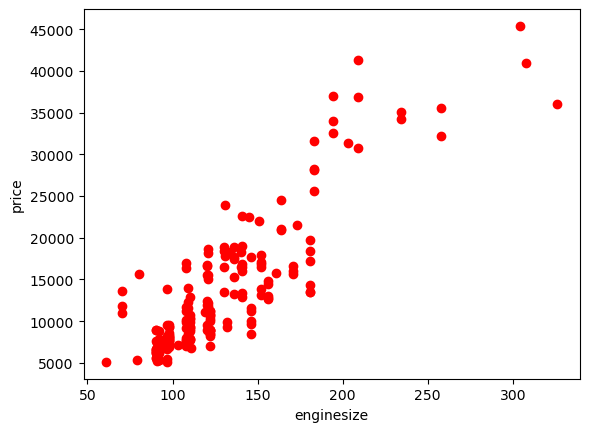

In [44]:
plt.scatter(cdf.enginesize , cdf.price , color = 'red')
plt.xlabel('enginesize')
plt.ylabel('price')
plt.show()

In [45]:
msk = np.random.rand(len(df)) < 0.8
train=cdf[msk] #80%
test=cdf[~msk] #20%

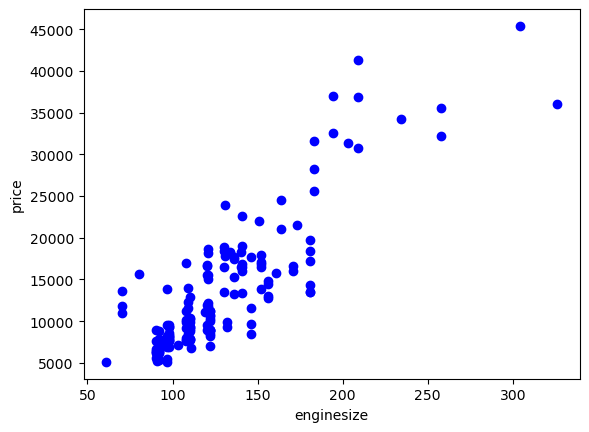

In [46]:
plt.scatter(train.enginesize , train.price , color = 'blue')
plt.xlabel('enginesize')
plt.ylabel('price')
plt.show()

In [23]:
#Mulitple Regressione Model

In [47]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['enginesize', 'stroke','boreratio']])
y = np.asanyarray(train[['price']])
regr.fit(x, y)
print('coefficients:', regr.coef_)
print('Intercept:' , regr.intercept_)

coefficients: [[  159.11206504 -2200.72637579  2546.04582316]]
Intercept: [-8124.8146548]


In [48]:
y_hat=regr.predict(test[['enginesize', 'stroke','boreratio']])
x=np.asanyarray(test[['enginesize', 'stroke','boreratio']])
y=np.asanyarray(test[['price']])
print('Residual sum of squares:%.2f'
     %np.mean((y_hat-y)**2))
print('Variance score:%.2f'% regr.score(x,y))

Residual sum of squares:13603245.46
Variance score:0.83


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
